Cálculo de Probabilidad

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt 
import sympy as sp 

Ejercicio 1-Cartas


In [3]:
N = 10000000

Si las primeras dos cartas son espadas, ¿cuál es la probabilidad de qué las tres siguientes sean espadas?

In [4]:
tres_espadas = 0
pro_tres_espadas = 0

for i in range(N):
    cartas = np.zeros(52)
    cartas[:13] =1
    np.random.shuffle(cartas[2:])
    
    if sum(cartas[:5]) == 5:
        
        tres_espadas+=1

In [5]:
pro_tres_espadas= tres_espadas/N
pro_tres_espadas

0.0084037

Si las primeras 3 cartas son todas espadas,¿cuál es la probabilidad de que las cartas dos siguientes sean también espadas?

In [6]:
dos_espadas = 0
pro_dos_espadas = 0

for i in range(N):
    cartas = np.zeros(52)
    cartas[:13] =1
    np.random.shuffle(cartas[3:])
    
    if sum(cartas[:5]) == 5:
        
        dos_espadas+=1

In [7]:
pro_dos_espadas= dos_espadas/N
pro_dos_espadas

0.0382665

Si las primeras 4 cartas son todas espadas,¿cuál es la probabilidad de que la siguiente carta sea una espada?

In [8]:
una_espada = 0
pro_una_espada = 0

for i in range(N):
    cartas = np.zeros(52)
    cartas[:13] =1
    np.random.shuffle(cartas[4:])
    
    if sum(cartas[:5]) == 5:
        
        una_espada+=1

In [9]:
pro_una_espada = una_espada/N
pro_una_espada

0.187308

Ejercicio 2-Personas enfermas

Probabilidad de exposición: 0.6

Probabilidad C vacuna: 0.2
Probabilidad C sin vacuna: 0.9

Probabilidad de NC con vacuna: 0.8
Probabilidad NC sin vacuna: 0.1

Los eventos son independientes entre sí

In [10]:
p_e = 0.6

p_c_v = 0.2
p_c_nv = 0.9

p_nc_v = 0.8
p_nc_nv = 0.1

#¿Cúal es la probabilidad de que al menos una se contagie?
#Existen 4 casos. Uno donde ninguna persona se contagia; otro donde la vacunada se contagia, o la persona sin vacunar se contagia, o que ambos se contagien.

p_nc = ((p_e * p_nc_v)+((1-p_e)*1)) * ((p_e * p_nc_nv)+(1-p_e))

p_c_1 = 1-p_nc
p_c_1


0.5952

Distribuciones de probabilidad discretas

Ejercicio 1

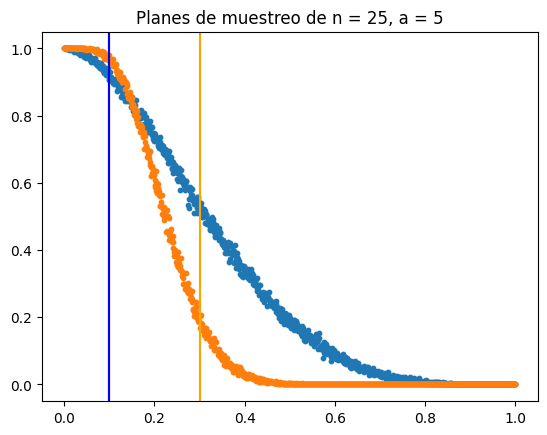

In [15]:
def piezas_defectuosas(n,a,N):
    
    piezas = np.linspace(0,1,N)
    prob = np.zeros(N)
    tamaño = piezas.shape[0]
    for i in range(tamaño):
        arreglo = np.random.binomial(n,piezas[i],size=N)
        prob[i] = np.mean(arreglo<=a)
    plt.scatter (piezas,prob,s=10)
    plt.title("Planes de muestreo de n = {0}, a = {1}".format(n,a))
    plt.axvline(x = 0.1, color='blue')
    plt.axvline(x = 0.3, color='orange')
    plt. show

piezas_defectuosas(5,1,1000)
piezas_defectuosas(25,5,1000)

a) Teniendo en cuenta que p = 0 y a = 10, el plan de muestreo que mejor correspondería sería el de n=5 a=1, porque a partir de la gráfica que puede determinar que hay buenas piezas aceptadas para la cantidad en total que se analizan; en otras palabras, la mayoría que son sometidas, son aceptadas con un bajo rango de estar defectuosas.

b) Si quisiera minimizar la probailidad de adquirir piezas defectuosas con un p $\geq$ 30, el plan de muestreo que mejor correspondería sería el de n= 25 y a = 5. Porque a medida que se incrementan las piezas, la proporción de fichas defectuosas va bajando.

Ejercicio 2

Distribuciones de probabilidad continuas

Ejercicio 1

Ejercicio 2-Calificaciones-Normal

In [ ]:
calificaciones = np.random.normal(78,6,N)

In [ ]:
calificaciones.sort()
calificaciones

array([ 48.10985713,  48.3090998 ,  48.64642147, ..., 107.35556792,
       107.53471475, 108.02195141])

¿Cuál es la probabilidad de que una persona que haga el examen alcance calificaciones mayores de 72?

In [ ]:
c_72 = 0

l_calificaciones = []

for calificacion in calificaciones:
    
    if calificacion > 72:
        l_calificaciones.append(calificacion)
        c_72 += 1
        
p_c72 = c_72/N
p_c72

0.8412571

In [ ]:
def percentil(v_percentil):
    
    p = (v_percentil/100) * (N+1)
    
    if p.is_integer():
        
        return calificaciones[int(p)-1]
    
    else:
        n = int(p)
        c = p - n 
        
        return calificaciones[n-1] + c * (calificaciones[n] - calificaciones[n-1])
    
    

Suponga que los estudiantes alcancen el 10% más alto de esta distribución reciben una calificación de A. ¿Cuál es la calificación mínima que un estudiante debe recibir para ganar una calificación de A?

In [ ]:
#Para resolver este problema hay que tener en cuenta que al calcular el percentil, se estima el porcentaje de notas más altas.
calificacion_min = percentil(90)
calificacion_min

85.69059975940543

¿Cuál debe ser el punto límite para pasar el examen si el examinador desea pasar sólo al 28.1% más alto de todas las calificaciones?

In [ ]:
calificacion_pl = percentil(71.9)
calificacion_pl

81.48139296914532

Aproximadamente qué proporción de estudiantes tienen calificaciones de 5 o más puntos arriba de la calificación que corta al 25% más bajo?

In [ ]:
pro_mas_calificacion = 0
calificacion_25 = percentil(25)

calificacion_deseada = calificacion_25+5

for calificacion in calificaciones:
    
    if calificacion > calificacion_deseada:
        
        pro_mas_calificacion += 1
      
p_c25 = pro_mas_calificacion/N
p_c25


0.4370476

Si se sabe que la calificación de una estudiante excede de 72, ¿cuál es la probabilidad de que su calificación excede de 84?

In [ ]:
c_84 = 0
p_c_84 = 0

for calificacion in l_calificaciones:
    
    if calificacion > 84:
        c_84 += 1

p_c84 = c_84/N
p_c84

0.1587752

In [ ]:
#Para hallar la probabilidad condicional se debe dividir el resultado de la probabilidad de calificaciones mayores que 84 entre calificaciones mayores a 72

p_tcalificaciones = p_c84/p_c72
p_tcalificaciones

0.18873564336039483

Cadenas de Markov

Las bases nitrogenadas fundamentales que componen el ADN son : Adeninda (A), Citosina (C), Guanina (G) y Timina (T). Un gen se puede representar a través de una secuencia ordenada de dichas bases. Suponga la siguiente matriz de transiciones entre bases.

In [ ]:
T = np.array([[0.4,0.2,0.2,0.2],[0.25,0.25,0.25,0.25],[0.3,0.3,0.1,0.7],[0.1,0.1,0.1,0.7]])

In [ ]:
T.T

array([[0.4 , 0.25, 0.3 , 0.1 ],
       [0.2 , 0.25, 0.3 , 0.1 ],
       [0.2 , 0.25, 0.1 , 0.1 ],
       [0.2 , 0.25, 0.7 , 0.7 ]])

In [ ]:
a_priori = np.array([0.25,0.,0.5,0.25])

In [ ]:
prob_cadenag = (a_priori[3])*(T[3,2])*(T[2,1])*(T[1,3])*(T[3,1])*(T[1,0])*(T[0,0])*(T[0,0])
prob_cadenag



7.500000000000001e-06

Estas bases nitrogenadas pasarán un proceso por un traducción donde el objetivo es que traduzcan A-U, C-G, G-C,T-A según la siguiente matriz de emisión.

In [ ]:
E = np.array([[0.8,0.,0.,0.2],[0.05, 0.9, 0.1, 0.1],[0.05, 0.1,0.9,0.],[0.1,0.,0.,0.7]])
E

array([[0.8 , 0.  , 0.  , 0.2 ],
       [0.05, 0.9 , 0.1 , 0.1 ],
       [0.05, 0.1 , 0.9 , 0.  ],
       [0.1 , 0.  , 0.  , 0.7 ]])

Si un gen traducido está dado por gr = [A,C,G,A,G,U,U,U],¿Cuál es la probabilidad de que venga del gen anterior g?

In [ ]:
prob_cadena_gr = prob_cadenag * (E[3,3])*(E[2,2])*(E[1,1])*(E[3,3])*(E[1,1])*(E[0,0])*(E[0,0])*(E[0,0])

prob_cadena_gr

1.3716864000000001e-06